WEEK 13:
Build model to perform Clustering using K-means after applying PCA and Determining
the value of K using Elbow method.

In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score

In [3]:
df = pd.read_csv('Mall_Customers.csv')

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
print('Duplicate Rows Count : ', df.duplicated().sum())

df=df.drop_duplicates(keep="first")

Duplicate Rows Count :  0


In [7]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
df["Gender"] = df["Gender"].astype('category').cat.codes
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [9]:
def pca(data, n):
    
    if type(n) == int:
        
        pca = PCA(n_components = n )
        pca.fit(data)
        df_pca = pca.transform(data)
        return df_pca
        
    else:
        return data

In [10]:
df.drop('CustomerID',axis=1, inplace=True)

#Sample
df_pca = pca(df, 2)
df_pca = pd.DataFrame(df_pca, columns = ['P1','P2'])
df_pca.head()

,P1,P2
0,-31.869945,-33.001252
1,0.764494,-56.842901
2,-57.408276,-13.124961
3,-2.168543,-53.478590
4,-32.174085,-30.388412


Text(0, 0.5, 'PCA 2')

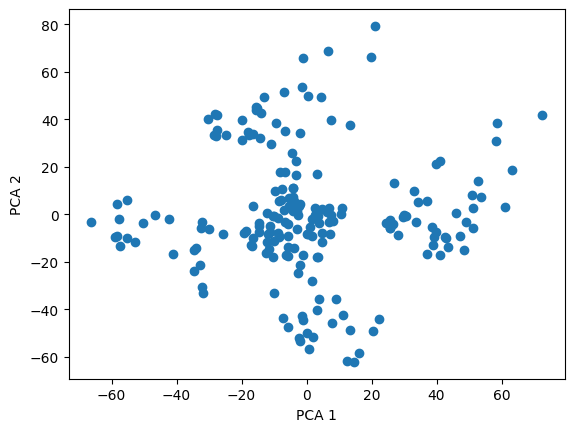

In [11]:
# View of the dataset after PCA

plt.scatter(df_pca.P1, df_pca.P2)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

In [12]:
def cluster_Wcss(data, k ):
       
    wcss = []
    
    for i in range(1, k):
        kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)
    
    plt.figure(figsize=(10,5))
    plt.plot(range(1,11), wcss)
    plt.title('The Elbow Curve')
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS')
    plt.show()

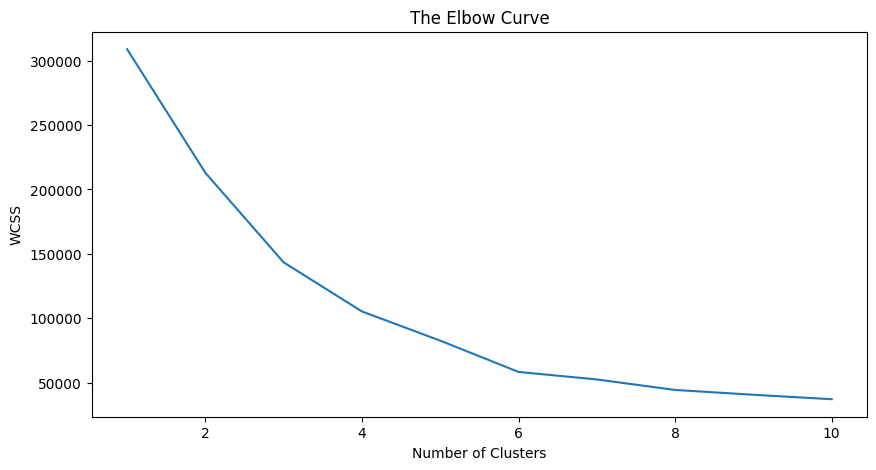

In [13]:
cluster_Wcss(df, 11)

In [14]:
param_data = { 'n' : [2,'False'] }
param_data = [dict(zip(param_data.keys(), v)) for v in itertools.product(*param_data.values())]

param_model = { 
    'n_clusters': [3, 4, 5 , 6],
    'init' : ['k-means++'],
    'random_state' :[16]
}
param_model = [dict(zip(param_model.keys(), v)) for v in itertools.product(*param_model.values())]

In [15]:
def cluster(data, param_data, param_model):

    last =[]
    
    for dp in param_data:

        X = pca(data, dp['n'])
        X = pd.DataFrame(X) 
        for mp in param_model:

            model = KMeans(**mp)

            y_means = model.fit_predict(X)
            centers = model.cluster_centers_
            
            silhouette = silhouette_score(X, y_means)
            davies_bouldin = davies_bouldin_score(X, y_means)
            
            res = {}
            res['Model'] = 'Kmeans'
            res['Random_State'] = mp['random_state']
            
            res['Pca'] = dp['n']
            res['Params'] = mp
            res['Centers'] = centers
            res['Silhouette'] = silhouette
            res['Davies_Bouldin'] = davies_bouldin
               
            last.append(res)
            
    result = pd.DataFrame(last, columns=['Model','Pca','Params', 'Centers', 'Silhouette', 'Davies_Bouldin'])
    
    return result

In [16]:
result =  cluster(df,  param_data, param_model)
result = result.sort_values(by=['Silhouette'], ascending=False)
result.head()

,Model,Pca,Params,Centers,Silhouette,Davies_Bouldin
2,Kmeans,2,"{'n_clusters': 5, 'init': 'k-means++', 'random...","[[-44.386754682281016, -10.050438135163047], [...",0.552626,0.584301
1,Kmeans,2,"{'n_clusters': 4, 'init': 'k-means++', 'random...","[[-13.5403825212534, -5.490004392760491], [41....",0.494651,0.690497
7,Kmeans,False,"{'n_clusters': 6, 'init': 'k-means++', 'random...","[[0.4090909090909091, 44.31818181818182, 25.77...",0.451356,0.754751
0,Kmeans,2,"{'n_clusters': 3, 'init': 'k-means++', 'random...","[[-10.226834734150358, -12.856134668289071], [...",0.451053,0.731013
3,Kmeans,2,"{'n_clusters': 6, 'init': 'k-means++', 'random...","[[-44.386754682281016, -10.050438135163047], [...",0.449792,0.700036


In [17]:
bp = result.Params[2]
bn = result.Pca[2]
bc = result.Centers[2]

In [18]:
X = pca(df, bn)
X = pd.DataFrame(X, columns = ['P1','P2'])

model = KMeans(**bp) 

y_means = model.fit_predict(X)

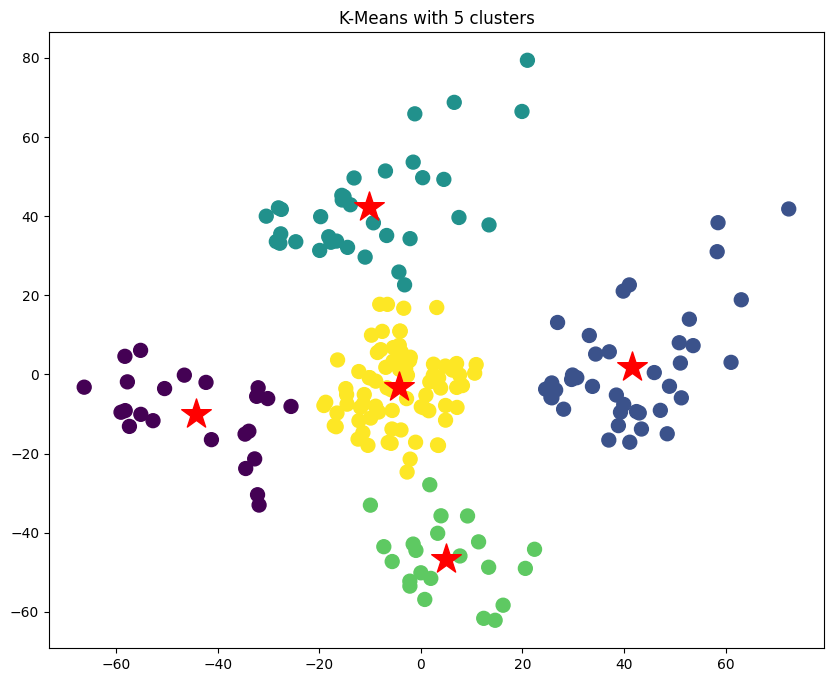

In [19]:
plt.figure(figsize=(10, 8))

plt.title('K-Means with 5 clusters')

plt.scatter(X.P1, X.P2, c=y_means, s=100)

plt.scatter(bc[:,0], bc[:,1], color='red', marker='*', s=500) 